In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df=pd.read_csv('online_shoppers_intention.csv',header = 2)
df.drop(['Unnamed: 18','Administrative.1','Unnamed: 20'], axis = 1, inplace = True)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
num_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

cat_features = ['SpecialDay', 'Weekend',
       'Revenue','VisitorType','Month','Browser','Region', 'TrafficType']

num_df = df[num_features]
cat_df = df[cat_features]

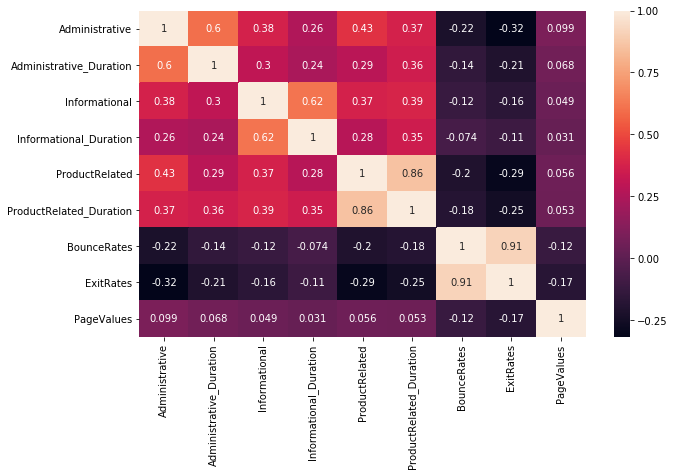

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(num_df.corr(), annot = True)
plt.show()

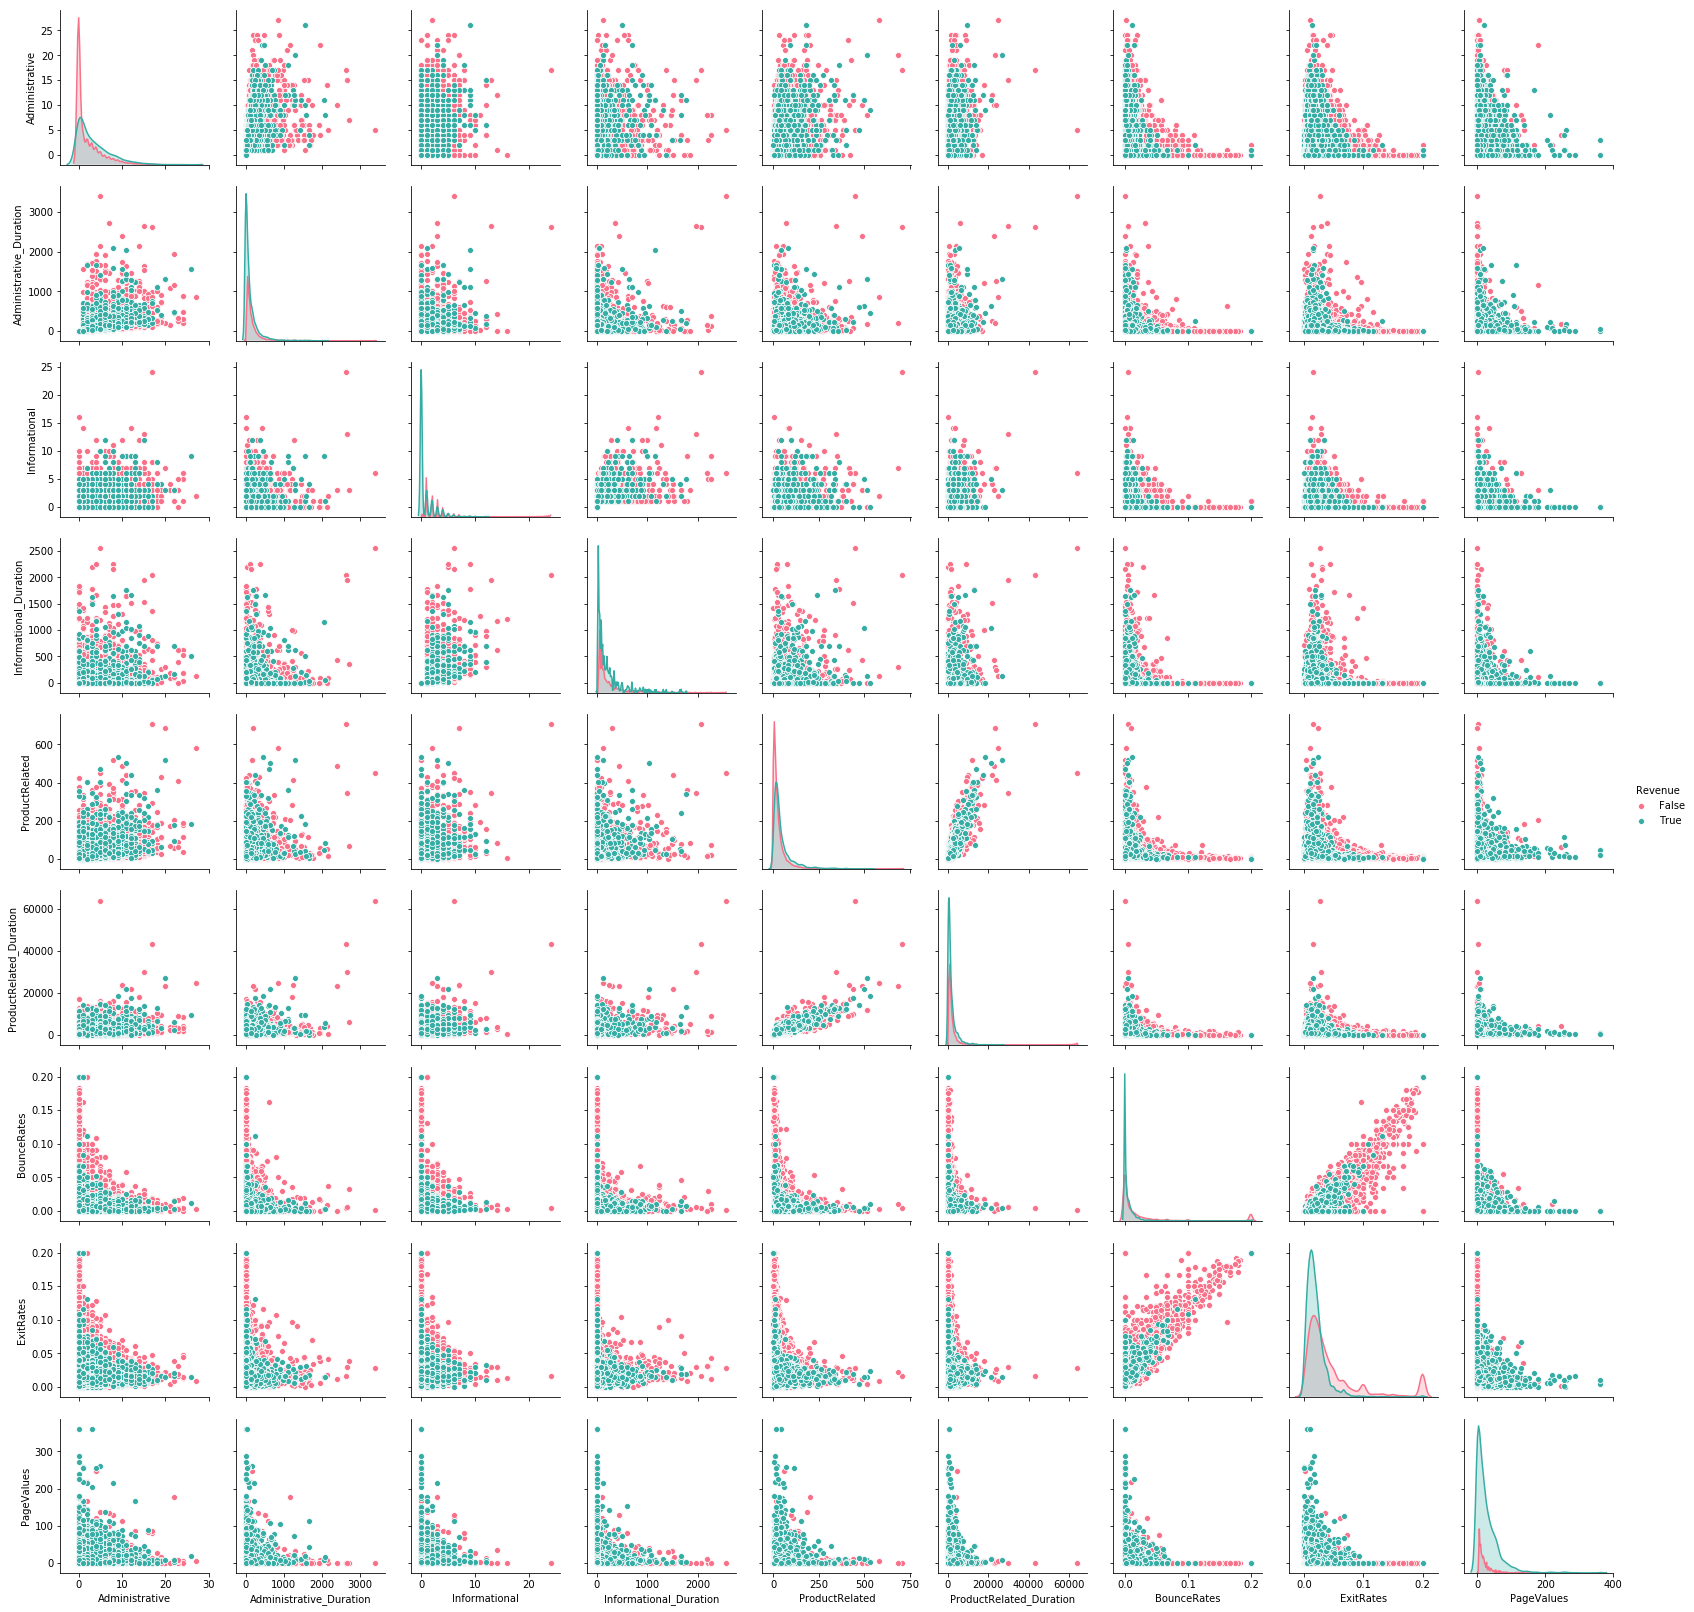

In [40]:
sns.pairplot(df, vars = df[num_features], hue = 'Revenue', palette='husl')

In [12]:
True_Rev = df[df['Revenue']==True]
False_Rev = df[df['Revenue'] == False]

### Administrative vs Revenue

In [14]:
true_rev_adm = True_Rev['Administrative']
false_rev_adm = False_Rev['Administrative']

In [18]:
# 1. Check for normality
print(stats.shapiro(true_rev_adm))
print(stats.shapiro(false_rev_adm))

(0.8382278680801392, 2.5744375126882674e-40)
(0.7102540135383606, 0.0)


In [19]:
# 2. Check for variance
print(stats.bartlett(true_rev_adm, false_rev_adm))

BartlettResult(statistic=80.4733565457259, pvalue=2.9465112975007956e-19)


Both the samples are not normally distributed.

Variance are not same for the groups.

So we will go for non parametric test.

In [20]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_adm, false_rev_adm)

MannwhitneyuResult(statistic=7421135.5, pvalue=6.559658546265514e-78)

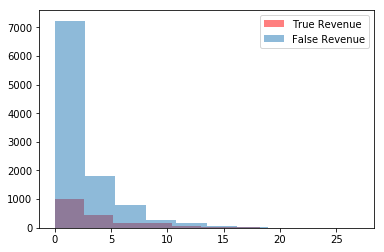

In [54]:
plt.hist(true_rev_adm, alpha = 0.5,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_adm, alpha = 0.5, label = 'False Revenue')
plt.legend()
plt.show()

Distributions of the both groups are not identical

In [24]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_adm, false_rev_adm)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  223.5637316375474
pvalue :  1.5103254647995302e-50
median :  1.0
Table :  [[1103 4105]
 [ 805 6317]]


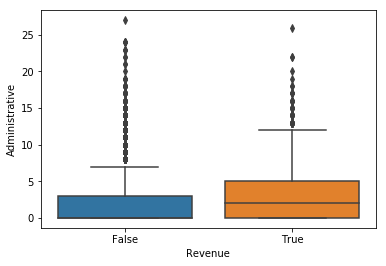

In [55]:
sns.boxplot(y = 'Administrative', x='Revenue', data=df)

Mood's median test is showing pvalue is less than 0.05. so we can say that median of Administrative for true and false revenue category are not same.

### Administrative_Duration vs Revenue

In [26]:
true_rev_adm_dur = True_Rev['Administrative_Duration']
false_rev_adm_dur = False_Rev['Administrative_Duration']
# 1. Check for normality
print(stats.shapiro(true_rev_adm_dur))
print(stats.shapiro(false_rev_adm_dur))

(0.5958540439605713, 0.0)
(0.45490342378616333, 0.0)


In [27]:
# 2. Check for variance
print(stats.bartlett(true_rev_adm_dur, false_rev_adm_dur))

BartlettResult(statistic=91.16853093144326, pvalue=1.3194199565430928e-21)


Both the samples are not normally distributed and also the variance are not same. So we will go for non parametric test

In [29]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_adm_dur, false_rev_adm_dur)

MannwhitneyuResult(statistic=7487115.0, pvalue=2.3361304523849337e-74)

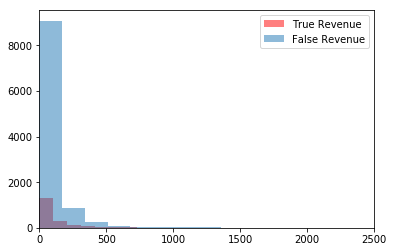

In [58]:
plt.hist(true_rev_adm_dur, alpha = 0.5,bins = 20,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_adm_dur, alpha = 0.5,bins = 20, label = 'False Revenue')
plt.xlim(0,2500)
plt.legend()
plt.show()

Distribution of both the sample are not identical.

In [30]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_adm_dur, false_rev_adm_dur)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  335.53631691487533
pvalue :  5.984116135267564e-75
median :  7.5
Table :  [[1322 4841]
 [ 586 5581]]


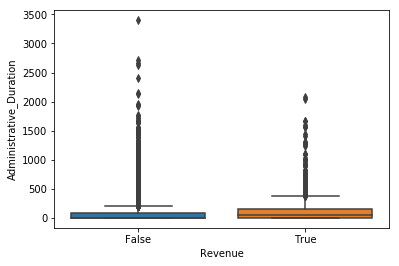

In [59]:
sns.boxplot(y = 'Administrative_Duration', x='Revenue', data=df)

Pvalue is less than 0.05 so we have to reject the null hypothesis that the median of both the samples are same.

### Informational vs Revenue

In [41]:
true_rev_inf = True_Rev['Informational']
false_rev_inf = False_Rev['Informational']
# 1. Check for normality
print(stats.shapiro(true_rev_inf))
print(stats.shapiro(false_rev_inf))

(0.5883256793022156, 0.0)
(0.42951542139053345, 0.0)


In [42]:
# 2. Check for variance
print(stats.bartlett(true_rev_inf, false_rev_inf))

BartlettResult(statistic=184.90384088967792, pvalue=4.118986670357115e-42)


From the shapiro test and variance test we have found that both the smaples are not normally distributed and variance of the samples are not so we will go for a non-parametric test

In [43]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_inf, false_rev_inf)

MannwhitneyuResult(statistic=8648742.0, pvalue=6.013906980370946e-37)

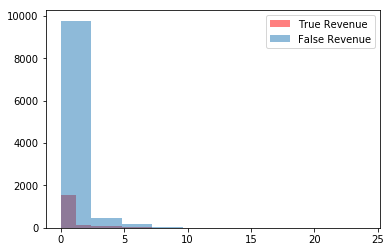

In [64]:
plt.hist(true_rev_inf, alpha = 0.5,bins = 10,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_inf, alpha = 0.5,bins = 10, label = 'False Revenue')

plt.legend()
plt.show()

From the mann-whitney U test we found that the distribution of the samples are not same.

In [44]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_inf, false_rev_inf)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  155.80233044936105
pvalue :  9.351102074657773e-36
median :  0.0
Table :  [[ 613 2018]
 [1295 8404]]


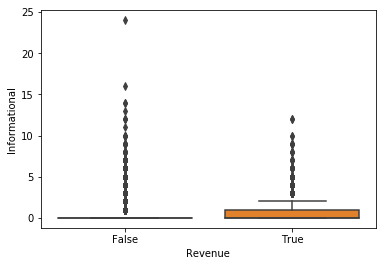

In [60]:
sns.boxplot(y = 'Informational', x='Revenue', data=df)

From the mood's median test  we can see that pvalue is less than 0.05 so we reject the null hypothesis, and say that median of both the groups are not same.

### Informational_Duration vs Revenue

In [46]:
true_rev_inf_dur = True_Rev['Informational_Duration']
false_rev_inf_dur = False_Rev['Informational_Duration']
# 1. Check for normality
print(stats.shapiro(true_rev_inf_dur))
print(stats.shapiro(false_rev_inf_dur))

(0.3806460499763489, 0.0)
(0.2333809733390808, 0.0)


In [47]:
# 2. Check for variance
print(stats.bartlett(true_rev_inf_dur, false_rev_inf_dur))

BartlettResult(statistic=221.79543634726613, pvalue=3.6707956592493566e-50)


In [48]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_inf_dur, false_rev_inf_dur)

MannwhitneyuResult(statistic=8711649.0, pvalue=7.045192525530919e-36)

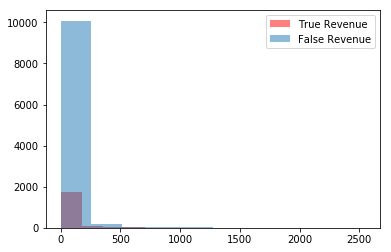

In [65]:
plt.hist(true_rev_inf_dur, alpha = 0.5,bins = 10,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_inf_dur, alpha = 0.5,bins = 10, label = 'False Revenue')

plt.legend()
plt.show()

Distribution of Informational_Duration for True and False Revnue category are not same.

In [49]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_inf_dur, false_rev_inf_dur)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  146.10019003717343
pvalue :  1.2343495105579972e-33
median :  0.0
Table :  [[ 565 1840]
 [1343 8582]]


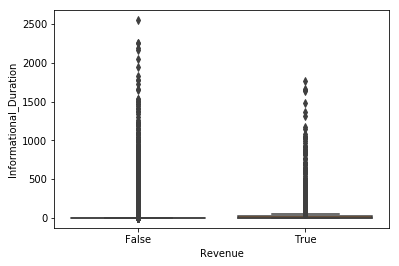

In [66]:
sns.boxplot(y = 'Informational_Duration', x='Revenue', data=df)

From the Mood's median test we found that pvalue is less than 0.05. So we can say that median of Informational_Duration for True and False Revenue Category are not same

### ProductRelated vs Revenue

In [76]:
true_rev_prd = True_Rev['ProductRelated']
false_rev_prd = False_Rev['ProductRelated']
# 1. Check for normality
print(stats.shapiro(true_rev_prd))
print(stats.shapiro(false_rev_prd))

(0.6663186550140381, 0.0)
(0.6018718481063843, 0.0)


In [77]:
# 2. Check for variance
print(stats.bartlett(true_rev_prd, false_rev_prd))

BartlettResult(statistic=482.93868547533134, pvalue=4.901130852681581e-107)


Both the samples are not normally distributed and there variance are also not same, So we go for non parametric test.

In [78]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_prd, false_rev_prd)

MannwhitneyuResult(statistic=6792127.0, pvalue=5.262192886345497e-108)

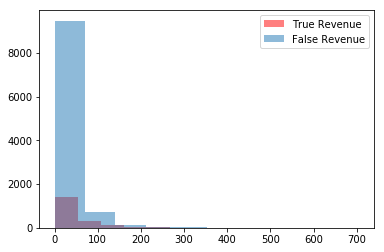

In [79]:
plt.hist(true_rev_prd, alpha = 0.5,bins = 10,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_prd, alpha = 0.5,bins = 10, label = 'False Revenue')

plt.legend()
plt.show()

Distribution of Informational_Duration for True and False Revnue category are not same.

In [74]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_prd, false_rev_prd)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  2207.890026721413
pvalue :  0.0
median :  347.27380949999997
Table :  [[  10 6155]
 [1898 4267]]


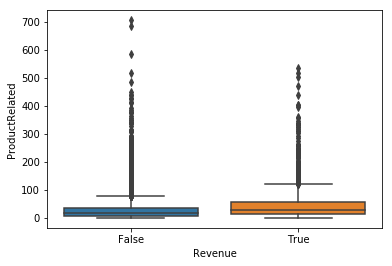

In [75]:
sns.boxplot(y = 'ProductRelated', x='Revenue', data=df)
plt.show()

From Mood's Median test we found pvalue to be very less than 0.05. So we can say that Median for the samples are not same.

### ProductRelated_Duration vs Revenue

In [80]:
true_rev_prd_dur = True_Rev['ProductRelated_Duration']
false_rev_prd_dur = False_Rev['ProductRelated_Duration']
# 1. Check for normality
print(stats.shapiro(true_rev_prd_dur))
print(stats.shapiro(false_rev_prd_dur))

(0.6756521463394165, 0.0)
(0.5226606130599976, 0.0)


In [81]:
# 2. Check for variance
print(stats.bartlett(true_rev_prd_dur, false_rev_prd_dur))

BartlettResult(statistic=222.1657003605895, pvalue=3.0478907133587784e-50)


Samples are not normally distributed and there variances are not same so go for the Non-parametric test

In [82]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_prd_dur, false_rev_prd_dur)

MannwhitneyuResult(statistic=6502463.0, pvalue=2.6661341820823105e-128)

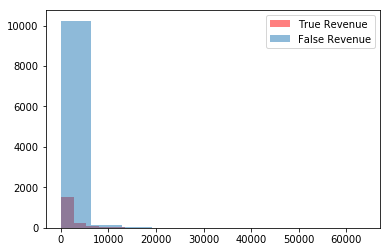

In [83]:
plt.hist(true_rev_prd_dur, alpha = 0.5,bins = 10,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_prd_dur, alpha = 0.5,bins = 10, label = 'False Revenue')

plt.legend()
plt.show()

From the mann-whitney U test we can see that pvalue is less than 0.05, so the distribution of the samples are not same.

In [84]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_prd_dur, false_rev_prd_dur)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  436.47317629977226
pvalue :  6.339075529985193e-97
median :  598.9369047499999
Table :  [[1374 4791]
 [ 534 5631]]


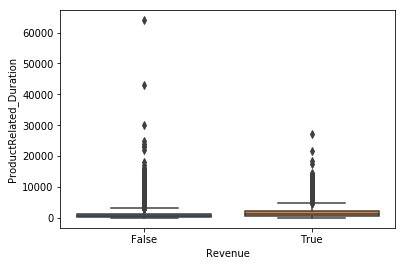

In [85]:
sns.boxplot(y = 'ProductRelated_Duration', x='Revenue', data=df)
plt.show()

From mood's median test we can see that pvalue is less than 0.05, so we can say that the median for the samples are not same. From the box plot we can see that medain for the True revenue category is slightly higher.

### BounceRates vs Revenue

In [87]:
true_rev_bnc = True_Rev['BounceRates']
false_rev_bnc = False_Rev['BounceRates']
# 1. Check for normality
print(stats.shapiro(true_rev_bnc))
print(stats.shapiro(false_rev_bnc))

(0.41849184036254883, 0.0)
(0.522879958152771, 0.0)


Samples are not normally distributed.

In [88]:
# 2. Check for variance
print(stats.bartlett(true_rev_bnc, false_rev_bnc))

BartlettResult(statistic=3576.8745562339336, pvalue=0.0)


Variances of the samples are not same.

So we go for non-parametric test

In [90]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_bnc, false_rev_bnc)

MannwhitneyuResult(statistic=7686683.0, pvalue=9.163850295589535e-62)

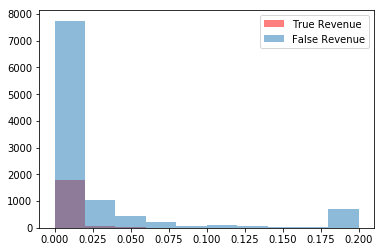

In [91]:
plt.hist(true_rev_bnc, alpha = 0.5,bins = 10,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_bnc, alpha = 0.5,bins = 10, label = 'False Revenue')

plt.legend()
plt.show()

Distributrion for the bounce rate for True and False Recvenue cattegory are not same.

In [92]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_bnc, false_rev_bnc)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  154.39553212905935
pvalue :  1.8979735918772772e-35
median :  0.0031124675
Table :  [[ 704 5461]
 [1204 4961]]


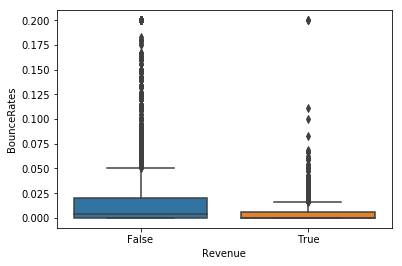

In [93]:
sns.boxplot(y = 'BounceRates', x='Revenue', data=df)
plt.show()

From the Mood's median test pavlue is less than 0.05 so, the median for the samples are not same, as we can see that median of Bounce Rates for False revenue category is higher than the true revenue category.

### ExitRates vs Revenue

In [94]:
true_rev_exit = True_Rev['ExitRates']
false_rev_exit = False_Rev['ExitRates']
# 1. Check for normality
print(stats.shapiro(true_rev_exit))
print(stats.shapiro(false_rev_exit))

(0.7655296325683594, 0.0)
(0.7226623296737671, 0.0)


Samples are not normally distributed.

In [95]:
# 2. Check for variance
print(stats.bartlett(true_rev_exit, false_rev_exit))

BartlettResult(statistic=2488.320334668035, pvalue=0.0)


Variances of the samples are not same.

So we go for non-parametric test

In [96]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_exit, false_rev_exit)

MannwhitneyuResult(statistic=5903869.0, pvalue=5.784120985913134e-176)

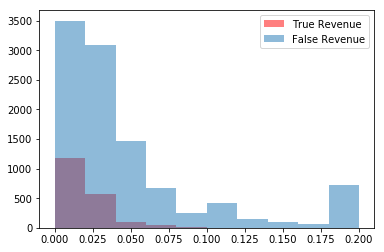

In [97]:
plt.hist(true_rev_exit, alpha = 0.5,bins = 10,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_exit, alpha = 0.5,bins = 10, label = 'False Revenue')

plt.legend()
plt.show()

Distributrion for the bounce rate for True and False Recvenue cattegory are not same.

In [98]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_exit, false_rev_exit)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  608.9490346980083
pvalue :  1.8938105913168142e-134
median :  0.0251564025
Table :  [[ 458 5707]
 [1450 4715]]


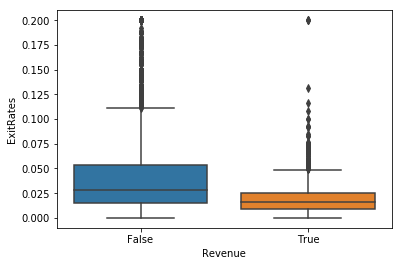

In [99]:
sns.boxplot(y = 'ExitRates', x='Revenue', data=df)
plt.show()

From the Mood's median test pavlue is less than 0.05 so, the median for the samples are not same, as we can see that median of Exit Rates for False revenue category is higher than the true revenue category.

### PageValues vs Revenue

In [101]:
true_rev_pv = True_Rev['PageValues']
false_rev_pv = False_Rev['PageValues']
# 1. Check for normality
print(stats.shapiro(true_rev_pv))
print(stats.shapiro(false_rev_pv))

(0.711025595664978, 0.0)
(0.22490006685256958, 0.0)


Samples are not normally distributed.

In [102]:
# 2. Check for variance
print(stats.bartlett(true_rev_pv, false_rev_pv))

BartlettResult(statistic=9062.50526272036, pvalue=0.0)


Variances of the samples are not same.

So we go for non-parametric test

In [103]:
# 3. Mann-whitney test
stats.mannwhitneyu(true_rev_pv, false_rev_pv)

MannwhitneyuResult(statistic=2718419.0, pvalue=0.0)

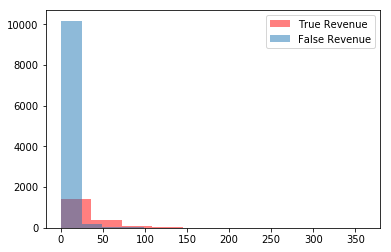

In [104]:
plt.hist(true_rev_pv, alpha = 0.5,bins = 10,color = 'red' ,label= 'True Revenue')
plt.hist(false_rev_pv, alpha = 0.5,bins = 10, label = 'False Revenue')

plt.legend()
plt.show()

Distributrion for the bounce rate for True and False Recvenue cattegory are not same.

In [105]:
# 4. Test of median
stat, pvalue, med, table = stats.median_test(true_rev_pv, false_rev_pv)
print('statistic : ',stat)
print('pvalue : ',pvalue)
print('median : ',med)
print('Table : ', table)

statistic :  4472.111309925902
pvalue :  0.0
median :  0.0
Table :  [[1538 1192]
 [ 370 9230]]


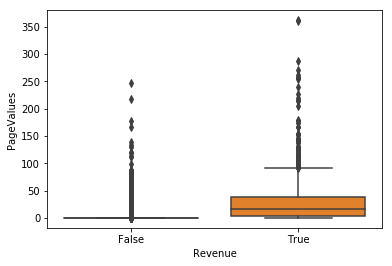

In [106]:
sns.boxplot(y = 'PageValues', x='Revenue', data=df)
plt.show()

From the Mood's median test pavlue is less than 0.05 so, the median for the samples are not same, as we can see that median of PageValues for True revenue category is higher than the False revenue category.

### Month vs Revenue

Revenue     False     True 
Month                      
Aug      0.824480  0.175520
Dec      0.874928  0.125072
Feb      0.983696  0.016304
Jul      0.847222  0.152778
June     0.899306  0.100694
Mar      0.899318  0.100682
May      0.891498  0.108502
Nov      0.746498  0.253502
Oct      0.790528  0.209472
Sep      0.808036  0.191964


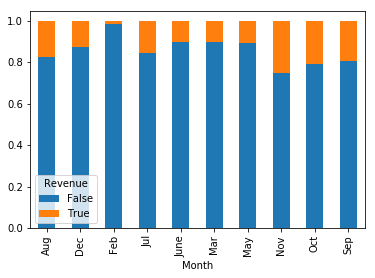

In [108]:
month_revenue = pd.crosstab(df['Month'], df['Revenue'])
month_revenue_sum = month_revenue.sum(axis = 1)
print(month_revenue.div(month_revenue_sum, axis = 0))
month_revenue.div(month_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

In [110]:
# Chisquare Test
stats.chi2_contingency(month_revenue)

(384.93476153599426,
 2.2387855164805443e-77,
 9,
 array([[ 365.99562044,   67.00437956],
        [1459.75620438,  267.24379562],
        [ 155.5270073 ,   28.4729927 ],
        [ 365.15036496,   66.84963504],
        [ 243.43357664,   44.56642336],
        [1611.90218978,  295.09781022],
        [2843.43941606,  520.56058394],
        [2534.07591241,  463.92408759],
        [ 464.04525547,   84.95474453],
        [ 378.67445255,   69.32554745]]))

After performing chi-square test we found that pvalue is less than 0.05. So we can reject the null hypothesis that the proportion of Sessions converted into revenue for all the months are same.

From the stacked bar chart in month of November Proportion of Sessions converted into revenue is higher than any other month, Whereas in month of February this proportion is very less.

### OperatingSystems vs Revenue

Revenue              False     True 
OperatingSystems                    
1                 0.853385  0.146615
2                 0.825027  0.174973
3                 0.895108  0.104892
4                 0.822176  0.177824
5                 0.833333  0.166667
6                 0.894737  0.105263
7                 0.857143  0.142857
8                 0.784810  0.215190


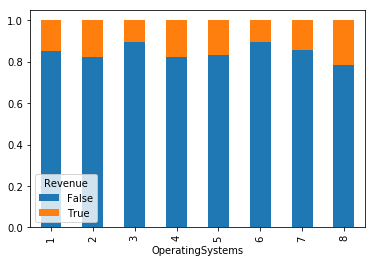

In [111]:
op_revenue = pd.crosstab(df['OperatingSystems'], df['Revenue'])
op_revenue_sum = op_revenue.sum(axis = 1)
print(op_revenue.div(op_revenue_sum, axis = 0))
op_revenue.div(op_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

In [112]:
# Chisquare test
stats.chi2_contingency(op_revenue)

(75.02705620298462,
 1.4160941129614401e-13,
 7,
 array([[2.18498540e+03, 4.00014599e+02],
        [5.57953139e+03, 1.02146861e+03],
        [2.15962774e+03, 3.95372263e+02],
        [4.04032117e+02, 7.39678832e+01],
        [5.07153285e+00, 9.28467153e-01],
        [1.60598540e+01, 2.94014599e+00],
        [5.91678832e+00, 1.08321168e+00],
        [6.67751825e+01, 1.22248175e+01]]))

Performing performing chisquare test we found that pavlue is less than 0.05.  So we reject the null hypothesis of Proportion of Sessions converted into Revnue through all operating system are same. So we can say that there is a relation between Revenue and Operating system.

We can see that the propotion is high for Operating system 8 than any other operating system.

### Browser vs Revenue

Revenue     False     True 
Browser                    
1        0.851747  0.148253
2        0.846376  0.153624
3        0.952381  0.047619
4        0.823370  0.176630
5        0.815846  0.184154
6        0.885057  0.114943
7        0.877551  0.122449
8        0.844444  0.155556
9        1.000000  0.000000
10       0.803681  0.196319
11       0.833333  0.166667
12       0.700000  0.300000
13       0.737705  0.262295


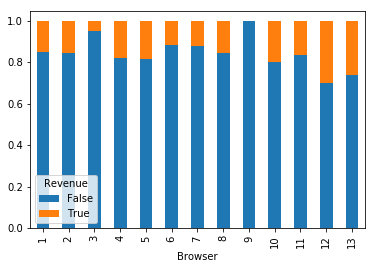

In [113]:
brwsr_revenue = pd.crosstab(df['Browser'], df['Revenue'])
brwsr_revenue_sum = brwsr_revenue.sum(axis = 1)
print(brwsr_revenue.div(brwsr_revenue_sum, axis = 0))
brwsr_revenue.div(brwsr_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

In [114]:
# Chisquare test
stats.chi2_contingency(brwsr_revenue)

(27.71529940138156,
 0.00608754317955109,
 12,
 array([[2.08101898e+03, 3.80981022e+02],
        [6.72907883e+03, 1.23192117e+03],
        [8.87518248e+01, 1.62481752e+01],
        [6.22108029e+02, 1.13891971e+02],
        [3.94734307e+02, 7.22656934e+01],
        [1.47074453e+02, 2.69255474e+01],
        [4.14175182e+01, 7.58248175e+00],
        [1.14109489e+02, 2.08905109e+01],
        [8.45255474e-01, 1.54744526e-01],
        [1.37776642e+02, 2.52233577e+01],
        [5.07153285e+00, 9.28467153e-01],
        [8.45255474e+00, 1.54744526e+00],
        [5.15605839e+01, 9.43941606e+00]]))

We can see that pvalue for the chi2 test is less than 0.05 , so we can say that there is a relation between Browser type and Revenue.

We can see from the stacked proportion of sessions done by browser type 12 converted into Revenue is higher than any other browser type.

### Region vs Revenue

Revenue     False     True 
Region                     
1        0.838703  0.161297
2        0.834507  0.165493
3        0.854765  0.145235
4        0.851946  0.148054
5        0.836478  0.163522
6        0.860870  0.139130
7        0.843627  0.156373
8        0.870968  0.129032
9        0.831703  0.168297


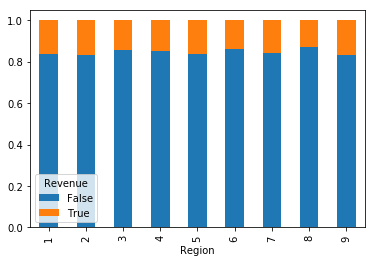

In [115]:
region_revenue = pd.crosstab(df['Region'], df['Revenue'])
region_revenue_sum = region_revenue.sum(axis = 1)
print(region_revenue.div(region_revenue_sum, axis = 0))
region_revenue.div(region_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

In [116]:
# Chisquare Test
stats.chi2_contingency(region_revenue)

(9.252751430579844,
 0.3214249979076556,
 8,
 array([[4040.32116788,  739.67883212],
        [ 960.21021898,  175.78978102],
        [2031.14890511,  371.85109489],
        [ 999.0919708 ,  182.9080292 ],
        [ 268.79124088,   49.20875912],
        [ 680.43065693,  124.56934307],
        [ 643.23941606,  117.76058394],
        [ 366.84087591,   67.15912409],
        [ 431.92554745,   79.07445255]]))

From the chisquare test we can see that pvalue is greater than 0.05, so we can say that there is no relation between Region and Revenue that is proportion of Sessions converted into Revenue is same for all the Regions.

### TrafficType vs Revenue

Revenue         False     True 
TrafficType                    
1            0.893105  0.106895
2            0.783542  0.216458
3            0.912281  0.087719
4            0.845650  0.154350
5            0.784615  0.215385
6            0.880631  0.119369
7            0.700000  0.300000
8            0.723032  0.276968
9            0.904762  0.095238
10           0.800000  0.200000
11           0.809717  0.190283
12           1.000000  0.000000
13           0.941734  0.058266
14           0.846154  0.153846
15           1.000000  0.000000
16           0.666667  0.333333
17           1.000000  0.000000
18           1.000000  0.000000
19           0.941176  0.058824
20           0.747475  0.252525


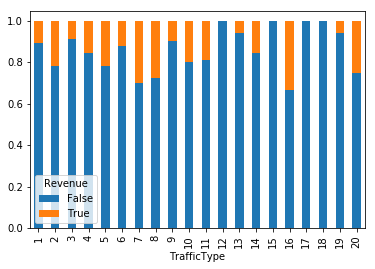

In [117]:
traffic_revenue = pd.crosstab(df['TrafficType'], df['Revenue'])
traffic_revenue_sum = traffic_revenue.sum(axis = 1)
print(traffic_revenue.div(traffic_revenue_sum, axis = 0))
traffic_revenue.div(traffic_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

In [118]:
# Chisquare Test
stats.chi2_contingency(traffic_revenue)

(373.1455646881486,
 1.652735258160153e-67,
 19,
 array([[2.07172117e+03, 3.79278832e+02],
        [3.30748467e+03, 6.05515328e+02],
        [1.73446423e+03, 3.17535766e+02],
        [9.03578102e+02, 1.65421898e+02],
        [2.19766423e+02, 4.02335766e+01],
        [3.75293431e+02, 6.87065693e+01],
        [3.38102190e+01, 6.18978102e+00],
        [2.89922628e+02, 5.30773723e+01],
        [3.55007299e+01, 6.49927007e+00],
        [3.80364964e+02, 6.96350365e+01],
        [2.08778102e+02, 3.82218978e+01],
        [8.45255474e-01, 1.54744526e-01],
        [6.23798540e+02, 1.14201460e+02],
        [1.09883212e+01, 2.01167883e+00],
        [3.21197080e+01, 5.88029197e+00],
        [2.53576642e+00, 4.64233577e-01],
        [8.45255474e-01, 1.54744526e-01],
        [8.45255474e+00, 1.54744526e+00],
        [1.43693431e+01, 2.63065693e+00],
        [1.67360584e+02, 3.06394161e+01]]))

Chi2 test showing pvalue is less than 0.05. So there is a relation between traffic type and Revenue.

Proportion of the visits converted into Revenue is highest for traffic type 16. 33% of the visits done through the traffic type 16 is converted into revenue. Whereas this proportion is lowest for traffic type 17 and 18.

### Visitor type vs Revenue

Revenue               False     True 
VisitorType                          
New_Visitor        0.750885  0.249115
Other              0.811765  0.188235
Returning_Visitor  0.860677  0.139323


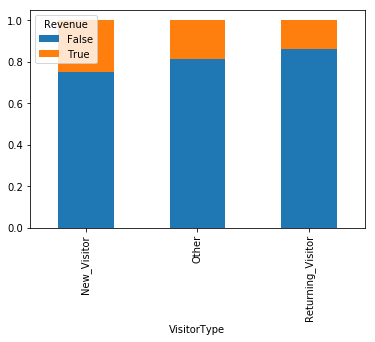

In [119]:
visitor_revenue = pd.crosstab(df['VisitorType'], df['Revenue'])
visitor_revenue_sum = visitor_revenue.sum(axis = 1)
print(visitor_revenue.div(visitor_revenue_sum, axis = 0))
visitor_revenue.div(visitor_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

In [121]:
# Chisquare Test
stats.chi2_contingency(visitor_revenue)

(135.2519228192047,
 4.269904152293867e-30,
 2,
 array([[1431.86277372,  262.13722628],
        [  71.84671533,   13.15328467],
        [8918.29051095, 1632.70948905]]))

From the chi2 test we can see that pvalue is less than 0.05. So we can say that there is an assosiation between Visitor type and Revenue.

From the stacked bar graph we can see that proportion of the revenue for the new visitor type is higher than any other visitor type.

### Weekend vs Revenue

Revenue     False     True 
Weekend                    
False    0.851089  0.148911
True     0.826011  0.173989


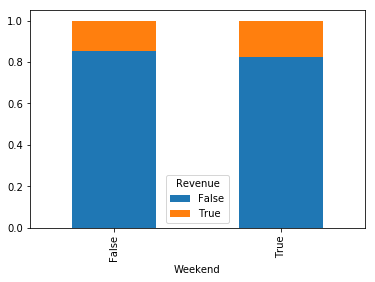

In [122]:
weekend_revenue = pd.crosstab(df['Weekend'], df['Revenue'])
weekend_revenue_sum = weekend_revenue.sum(axis = 1)
print(weekend_revenue.div(weekend_revenue_sum, axis = 0))
weekend_revenue.div(weekend_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

In [124]:
weekend_revenue

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


In [125]:
# Proportions_ztest

proportions_ztest((1409, 499),(1409+8053, 499+2369))

(-3.2529732781407104, 0.0011420423637110938)

from the proportions ztest we can see that pavlue is less than 0.05, so we can say that there is a relation  between weekend and Revenue.

From the bar graph we can see that proportions of the visits converted into revenue is more in Weekend than Weekdays.